Basic Induction Experiment
======================
Inducing +1 rule for scalar encoder
---------------------------------
We induce the rule of +1 on scalars by providing a series of example encodings and attempt to generate values.

examples: [-1.         -0.93103448 -0.86206897 -0.79310345 -0.72413793 -0.65517241
 -0.5862069  -0.51724138 -0.44827586 -0.37931034 -0.31034483 -0.24137931
 -0.17241379 -0.10344828 -0.03448276  0.03448276  0.10344828  0.17241379
  0.24137931  0.31034483  0.37931034  0.44827586  0.51724138  0.5862069
  0.65517241  0.72413793  0.79310345  0.86206897  0.93103448  1.        ]
From:


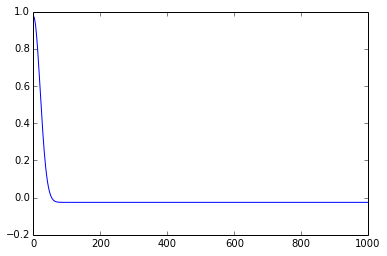

To:


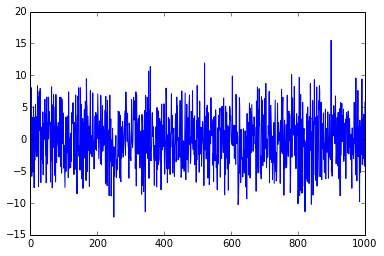

From:


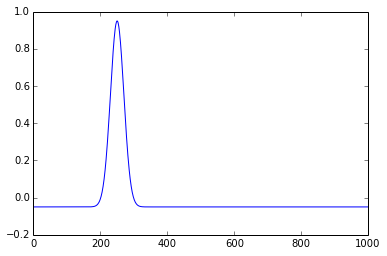

To:


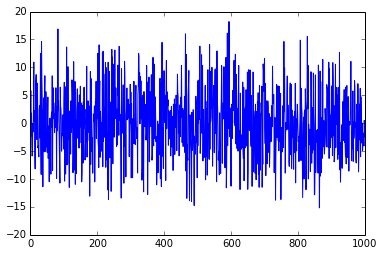

From:


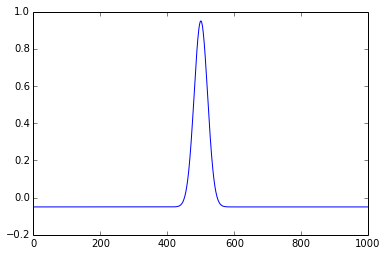

To:


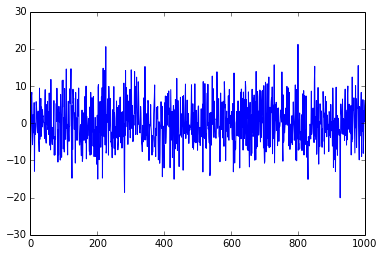

From:


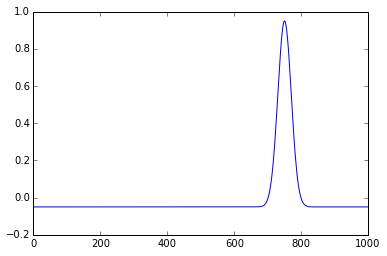

To:


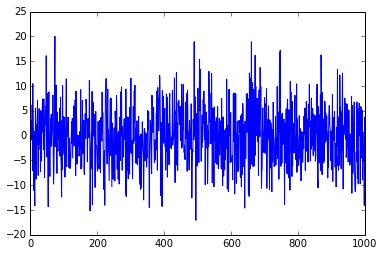

From:


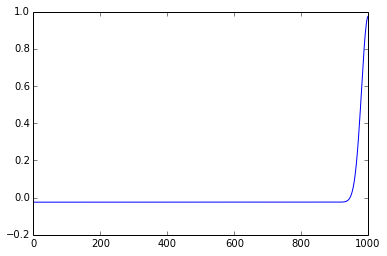

To:


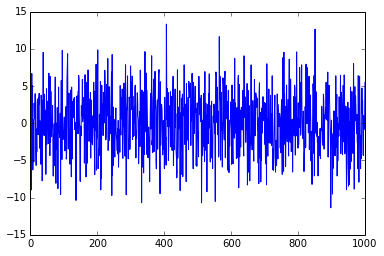

In [27]:
import numpy as np
import random
from hrr import HRR
%matplotlib inline 

HRR.reset_kernel()
HRR.verbose = False

input_range = 1
probes = 3
steps = 1
size = 1000

# function to learn
def f(x):
    return np.sin(x)

HRR.input_range = [-input_range, input_range]
HRR.set_size(size)


# generate learning dataset
examples = np.linspace(-input_range, input_range, num=30)
print('examples: {}'.format(examples))

# create storage for averaging
exs = np.empty((examples.size, size), dtype=float)

for idx, e in enumerate(examples):
    A = float(e)
    B = f(A)
    
    exs[idx] = (HRR(B) % A).memory
    
m = HRR(0,generator=exs)

probes = np.linspace(-input_range, input_range, num=5)
for p in probes:
    i = HRR(float(p))
    print("From:")
    HRR.plot(HRR.reverse_permute(i.memory))
    print("To:")
    HRR.plot(HRR.reverse_permute((m * i).memory))